<a href="https://colab.research.google.com/github/deepankan-rai/SVMClassification/blob/main/SVMClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
file_path = "/content/breast-cancer.csv"
data = pd.read_csv(file_path)

In [3]:
data["diagnosis"] = LabelEncoder().fit_transform(data["diagnosis"]) # M=1, B=0


X = data.drop(["id", "diagnosis"], axis=1)
y = data["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)


svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


print("Linear Kernel Accuracy:", svm_linear.score(X_test, y_test))
print("RBF Kernel Accuracy:", svm_rbf.score(X_test, y_test))

Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9736842105263158


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)


svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_train_pca, y_train_pca)

SVC(C=1)

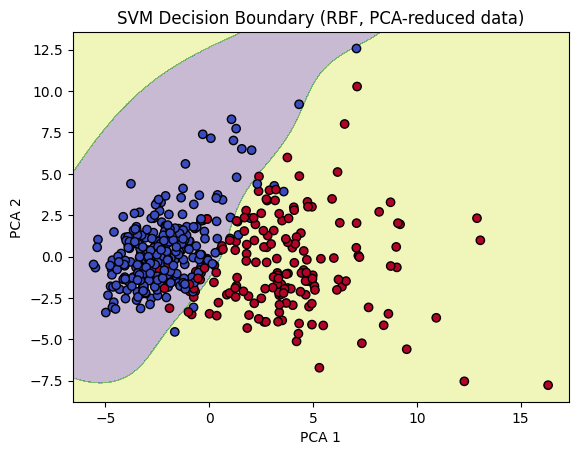

In [7]:
def plot_decision_boundary(model, X, y):
  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title("SVM Decision Boundary (RBF, PCA-reduced data)")
  plt.show()


plot_decision_boundary(svm_vis, X_train_pca, y_train_pca)

In [10]:
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [1, 0.1, 0.01, 0.001],
'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)
print("\nBest Cross-validation Score:", grid.best_score_)
print("\nTest Accuracy with best params:", grid.score(X_test, y_test))
scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
X_scaled, y, cv=5)
print("\nCross-validation Accuracy Scores:", scores)
print("\nMean CV Accuracy:", scores.mean())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best Cross-validation Score: 0.9736263736263737

Test Accuracy with best params: 0.9824561403508771

Cross-validation Accuracy Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]

Mean CV Accuracy: 0.9789318428815401
